In [8]:

import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [9]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [ ]:
import tensorflow as tf
import numpy as np

X_train = X_train.reshape(len(X_train), 100, 100, 3)
X_test = X_test.reshape(len(X_test), 100, 100, 3)

# Resize using tf.image.resize
X_train = tf.image.resize(X_train, [244, 244]).numpy()
X_test = tf.image.resize(X_test, [244, 244]).numpy()

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape labels
Y_train = Y_train.reshape(len(Y_train), 1)
Y_test = Y_test.reshape(len(Y_test), 1)


In [10]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 244, 244, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 244, 244, 3)
Shape of Y_test:  (400, 1)


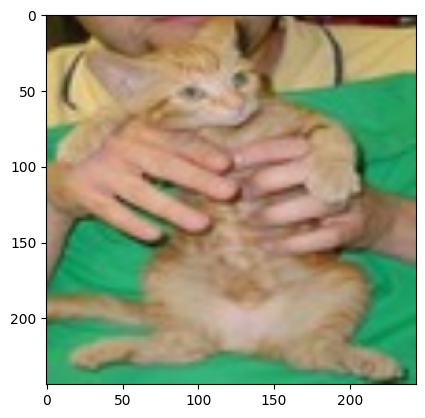

In [11]:

idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

Model

In [12]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Input(shape=(244, 244, 3)),  
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use 'softmax' if multi-class
])

In [13]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:

model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.8374 - loss: 0.4071
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8711 - loss: 0.3207
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.8851 - loss: 0.2702
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.9454 - loss: 0.1523
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.9668 - loss: 0.0988


Making predictions

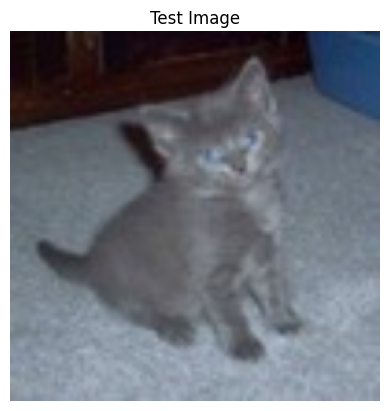

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Our model says it is a: cat


In [18]:

idx2 = random.randint(0, len(Y_test) - 1)

# Display the selected image
plt.imshow(X_test[idx2])
plt.axis('off')
plt.title("Test Image")
plt.show()

# Predict the class
y_pred = model.predict(np.expand_dims(X_test[idx2], axis=0))  # shape becomes (1, 244, 244, 3)
y_pred_label = (y_pred > 0.5).astype(int)

# Map prediction to class name
pred = 'dog' if y_pred_label[0][0] == 0 else 'cat'
print("Our model says it is a:", pred)

Pickling the model file for Deployement


In [102]:
import pickle

In [104]:
pickle.dump(model,open('model.pkl','wb'))

In [105]:
pickled_model=pickle.load(open('model.pkl','rb'))

In [108]:
pickled_model.predict(np.expand_dims(X_test[idx2], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


array([[0.00040248]], dtype=float32)